In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
churn = pd.read_csv('churn.txt')
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [4]:
churn.drop(["Day Calls", "Day Charge", "Eve Calls", "Eve Charge",
            "Night Calls", "Night Charge","Intl Calls", "Intl Charge", 
            "Area Code", "Phone","VMail Plan"],axis='columns',inplace=True)
churn.head()

,State,Account Length,Int'l Plan,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn?
0,KS,128,no,25,265.1,197.4,244.7,10.0,1,False.
1,OH,107,no,26,161.6,195.5,254.4,13.7,1,False.
2,NJ,137,no,0,243.4,121.2,162.6,12.2,0,False.
3,OH,84,yes,0,299.4,61.9,196.9,6.6,2,False.
4,OK,75,yes,0,166.7,148.3,186.9,10.1,3,False.


In [5]:
model_data = pd.get_dummies(churn,drop_first=True)

In [6]:
model_data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,State_AL,State_AR,State_AZ,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_yes,Churn?_True.
0,128,25,265.1,197.4,244.7,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,148.3,186.9,10.1,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
x_data = model_data.iloc[:,:58]
x_data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,State_AL,State_AR,State_AZ,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_yes
0,128,25,265.1,197.4,244.7,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,75,0,166.7,148.3,186.9,10.1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
y_data = model_data["Churn?_True."]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn?_True., dtype: uint8

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
print(x_scaled)

#better

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state = 999)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc_train= scaler.fit_transform(x_train)
x_sc_test = scaler.fit_transform(x_test)
print(x_sc_train)

#better than first scaler

[[ 0.14507304 -0.57808972  1.71141379 ... -0.17830285 -0.15140223
   2.99268697]
 [ 0.14507304 -0.57808972 -0.84952847 ... -0.17830285 -0.15140223
  -0.33414788]
 [ 0.52187896 -0.57808972  0.93048222 ... -0.17830285 -0.15140223
   2.99268697]
 ...
 [ 0.64748093 -0.57808972  0.01389587 ... -0.17830285 -0.15140223
   2.99268697]
 [-0.45781642  2.4492803  -0.4443973  ... -0.17830285 -0.15140223
  -0.33414788]
 [-0.63365918 -0.57808972  1.70774745 ... -0.17830285 -0.15140223
   2.99268697]]


In [63]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_sc_train_rus, y_train_rus = rus.fit_sample(x_sc_train, y_train)

In [12]:
logreg= LogisticRegression()

In [38]:
from sklearn.model_selection import GridSearchCV
# parameters to be searched
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search = GridSearchCV(logreg, param_grid, scoring='recall')
grid_result = grid_search.fit(x_sc_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8066315789473684 for {'C': 0.0001, 'solver': 'liblinear'}


In [64]:
# parameters to be searched
param_grid2 = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# find the best parameters
grid_search2 = GridSearchCV(logreg, param_grid2, scoring='accuracy')
grid_result2 = grid_search2.fit(x_sc_train_rus, y_train_rus)

print(f'Best result: {grid_result2.best_score_} for {grid_result2.best_params_}')

Best result: 0.7254657836644591 for {'C': 0.001, 'solver': 'newton-cg'}


In [65]:
logreg= LogisticRegression(solver='newton-cg',C=0.001)

In [66]:
logreg.fit(x_sc_train_rus,y_train_rus)

LogisticRegression(C=0.001, solver='newton-cg')

In [67]:
y_pred = logreg.predict(x_sc_test)

In [68]:
logreg.score(x_sc_test,y_test)

0.7721822541966427

In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[562, 166],
       [ 24,  82]], dtype=int64)

In [74]:
pd.crosstab(index=y_test, columns= y_pred, rownames=['actual'], colnames=['predictions'])

predictions,0,1
actual,,
0,562,166
1,24,82


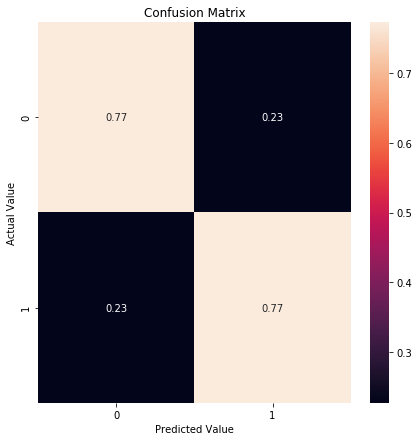

In [86]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')
plt.savefig('cm.png')

In [90]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg,x_sc_train_rus,y_train_rus,cv=10,scoring='accuracy').mean()

0.7280877192982456

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       728
           1       0.33      0.77      0.46       106

    accuracy                           0.77       834
   macro avg       0.64      0.77      0.66       834
weighted avg       0.88      0.77      0.81       834

